### Question 1

Assumptions of ANOVA:

1. Independence of Observations - Each observation in the data set should be independent of all others. This means that the value of one observation does not influence or relate to the value of another.

Violation e.g - If you have repeated measurements from the same subjects without accounting for this in the model, the observations are not independent. For instance, measuring the weight of patients multiple times after different treatments without considering the repeated measures.

Impact - Violations of independence can lead to underestimated variability and thus an increased likelihood of Type I errors (false positives).

2. Normality - The residuals (differences between observed and predicted values) of the data should be approximately normally distributed within each group.

Violation e.g - If the data are heavily skewed or have outliers, such as test scores from a very difficult exam where most students score very low, normality is violated.

Impact: Non-normal residuals can lead to incorrect conclusions, particularly with small sample sizes, as the F-test becomes less reliable.

3. Homogeneity of Variances (Homoscedasticity) - The variances within each group should be approximately equal.

Violation e.g - If one group has much more variability than another, such as comparing the incomes of different professional groups where one group (e.g., entrepreneurs) has a wide range of incomes compared to another group (e.g., teachers) with a more consistent income level, this assumption is violated.

Impact: Heteroscedasticity can lead to an inflated Type I error rate and reduced power of the test, making the ANOVA results less reliable.

### Question 2

There are 3 types of ANOVA :-
1. #### One Way ANOVA - It has 1 factor with atleast 2 levels, these levels are independent

Situation to use it:- 
1. When you have one categorical independent variable with three or more levels (e.g., diet type, school).
2. When the dependent variable is continuous (e.g., weight loss, test scores).
3. When each group is independent of the others.

2. #### Repeated measures ANOVA - It has 1 factor with atleast 2 levels and levels are independent.

Situation to use it:-
1. When you have one group of subjects measured multiple times under different conditions.
2. When the dependent variable is continuous.
3. When the measurements are correlated due to the same subjects being involved in each condition or time point.

3. #### Factorial ANOVA - A factorial ANOVA is any ANOVA that uses two or more independent factors and a single response variable. 

Use case:-

This type of ANOVA should be used whenever you’d like to understand how two or more factors affect a response variable and whether or not there is an interaction effect between the factors on the response variable.

### Question 3

Partitioning of variance in ANOVA is a statistical technique that breaks down the observed variance in a data set into different components. This process helps determine the relative contributions of different sources of variation. It's also used to test the significance of differences between means.

Importance of Partitioning Variance
1. Understanding Sources of Variability - Identifies if variability is due to differences between groups or within groups.
2. Calculating the F-Ratio
3. Hypothesis Testing - Tests if all group means are equal. Rejects null hypothesis if between-group variance is significantly larger.
4. Identifying Significant Factors - Assesses main effects and interaction effects in multifactor ANOVA.
5. Guiding Further Analysis - Helps refine models and investigate specific groups.

### Question 4

In [1]:
import numpy as np 
import pandas as pd


In [2]:
# sample data
data = {
    'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Value': [5, 6, 7, 8, 8, 9, 10, 10, 11]
}
df = pd.DataFrame(data)


In [4]:
# Calculate group means
group_means = df.groupby('Group')['Value'].mean()

In [5]:
# calculate overall mean
overall_mean = df['Value'].mean()
# SST
sst = np.sum((df['Value'] - overall_mean) ** 2)
print("Total Sum of Squares (SST):", sst)

# Between-Group Sum of Squares (SSB)
ssb = np.sum(df.groupby('Group').size() * (group_means - overall_mean) ** 2)
print("Between-Group Sum of Squares (SSB):", ssb)

# Within-Group Sum of Squares (SSW)
ssw = np.sum((df['Value'] - df['Group'].map(group_means)) ** 2)
print("Within-Group Sum of Squares (SSW):", ssw)

Total Sum of Squares (SST): 31.55555555555556
Between-Group Sum of Squares (SSB): 28.22222222222223
Within-Group Sum of Squares (SSW): 3.3333333333333335


### Quesition 5

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
# Example data
data = {
    'Factor1': ['A', 'A', 'B', 'B', 'A', 'A', 'B', 'B'],
    'Factor2': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Response': [10, 12, 15, 18, 9, 11, 14, 17]
}

df = pd.DataFrame(data)


In [12]:
df

,Factor1,Factor2,Response
0,A,Male,10
1,A,Female,12
2,B,Male,15
3,B,Female,18
4,A,Male,9
5,A,Female,11
6,B,Male,14
7,B,Female,17


In [13]:
# Fit the ANOVA model
model = ols('Response ~ C(Factor1) + C(Factor2) + C(Factor1):C(Factor2)', data=df).fit()

# Perform ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq   df      F    PR(>F)
C(Factor1)               60.5  1.0  121.0  0.000388
C(Factor2)               12.5  1.0   25.0  0.007490
C(Factor1):C(Factor2)     0.5  1.0    1.0  0.373901
Residual                  2.0  4.0    NaN       NaN


### Question 6

1. Conclusion: The differences between the group means are statistically significant.
2. Interpretation: The F-statistic (5.23) indicates there is significant variability between group means, and the p-value (0.02) suggests these differences are unlikely due to random chance.

Therefore, you can confidently conclude that the factor being studied has a statistically significant effect on the dependent variable.

## Quesiton 7

Handling Missing Data in Repeated Measures ANOVA

1. #### Identify Missing Data Patterns:

Determine if data are missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR).


### Methods to Handle Missing Data:

1. #### Complete Case Analysis: Exclude subjects with any missing data.

2. #### Mean Imputation: Replace missing values with the mean of observed values.

3. #### Multiple Imputation: Generate multiple datasets with plausible values for missing data.

4. #### Model-Based Methods: Estimate parameters using all available data under a specified model.

### Potential Consequences
1. Bias: Complete case analysis and mean imputation can bias results if missingness is related to outcomes or predictors.
2. Precision: Imputation methods can underestimate variability.
3. Validity: Validity depends on correctly identifying and addressing missing data patterns.

## Question 8 

After conducting an ANOVA (Analysis of Variance) and determining that there are significant differences between groups, post-hoc tests are used to identify which specific groups differ from each other. 

1. Tukey's Honestly Significant Difference (HSD):Use: Compare all possible pairwise differences between group means after finding significant differences in ANOVA with multiple groups.

2. Bonferroni Correction: Adjust significance level for multiple comparisons to control familywise error rate.
3. Dunnett's Test: Compare multiple treatment groups against a single control group.

#### Example Scenario:

Scenario: A researcher conducts an experiment to compare the effectiveness of four different fertilizers on crop yield. They use ANOVA to analyze the data and find a significant difference in crop yield between at least some of the fertilizers.

Post-Hoc Test Application: The researcher decides to perform Tukey's HSD test to determine which specific pairs of fertilizers differ significantly in crop yield. This helps in identifying which fertilizers are more effective than others and provides specific insights into their comparative effectiveness.

## Quesiton 9

In [14]:
import pandas as pd
from scipy.stats import f_oneway

# Example data (replace with your actual data)
data = {
    'Diet': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 
             'C', 'C', 'C', 'C', 'C'],
    'Weight_loss': [5.2, 4.8, 5.5, 5.9, 4.5, 4.0, 4.2, 4.1, 3.8, 3.9,
                    6.1, 5.8, 6.0, 5.5, 5.9]
}

df = pd.DataFrame(data)

# Conduct one-way ANOVA
f_statistic, p_value = f_oneway(df[df['Diet'] == 'A']['Weight_loss'],
                                df[df['Diet'] == 'B']['Weight_loss'],
                                df[df['Diet'] == 'C']['Weight_loss'])

# Print results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The one-way ANOVA indicates that there are significant differences between the mean weight loss of the three diets.")
else:
    print("The one-way ANOVA does not find significant differences between the mean weight loss of the three diets.")


F-statistic: 34.5091
P-value: 0.0000
The one-way ANOVA indicates that there are significant differences between the mean weight loss of the three diets.


## Question 10

In [16]:
data = {
    'Software': ['A', 'A', 'B', 'B', 'C', 'C', 'A', 'A', 'B', 'B', 
                 'C', 'C', 'A', 'A', 'B', 'B', 'C', 'C', 'A', 'A',
                 'B', 'B', 'C', 'C', 'A', 'A', 'B', 'B', 'C', 'C'],
    'Experience': ['Novice', 'Experienced'] * 15,
    'Time': [20, 22, 18, 19, 25, 24, 21, 23, 17, 19, 
             26, 25, 22, 21, 19, 20, 28, 27, 23, 22,
             16, 18, 24, 23, 19, 20, 25, 24, 18, 19]
}

In [17]:
df = pd.DataFrame(data)

In [18]:
df

,Software,Experience,Time
0,A,Novice,20
1,A,Experienced,22
2,B,Novice,18
3,B,Experienced,19
4,C,Novice,25
5,C,Experienced,24
6,A,Novice,21
7,A,Experienced,23
8,B,Novice,17
9,B,Experienced,19


In [19]:
# Convert categorical variables to categorical type
df['Software'] = pd.Categorical(df['Software'])
df['Experience'] = pd.Categorical(df['Experience'])

In [21]:
model = ols('Time ~ C(Software) + C(Experience) + C(Software):C(Experience)', data=df).fit()

In [24]:
annova_table = sm.stats.anova_lm(model , typ =2)

In [25]:
anova_table

,sum_sq,df,F,PR(>F)
C(Factor1),60.5,1.0,121.0,0.000388
C(Factor2),12.5,1.0,25.0,0.007490
C(Factor1):C(Factor2),0.5,1.0,1.0,0.373901
Residual,2.0,4.0,NaN,NaN


### Question 11

In [26]:
# Performing two sample t-test
from scipy.stats import ttest_ind

# Example data 
np.random.seed(42)  # for reproducibility
control_scores = np.random.normal(loc=70, scale=10, size=50)   # Control group scores
experimental_scores = np.random.normal(loc=75, scale=10, size=50)  # Experimental group scores

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(control_scores, experimental_scores)

# Print results
print(f"Two-sample t-test results:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in test scores between the control and experimental groups.")
else:
    print("There is no significant difference in test scores between the control and experimental groups.")


Two-sample t-test results:
T-statistic: -4.1087
P-value: 0.0001
There is a significant difference in test scores between the control and experimental groups.



Tukey's HSD post-hoc test results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2    meandiff p-adj  lower   upper  reject
----------------------------------------------------------
Control Experimental   7.4325 0.0001 3.8427 11.0224   True
----------------------------------------------------------


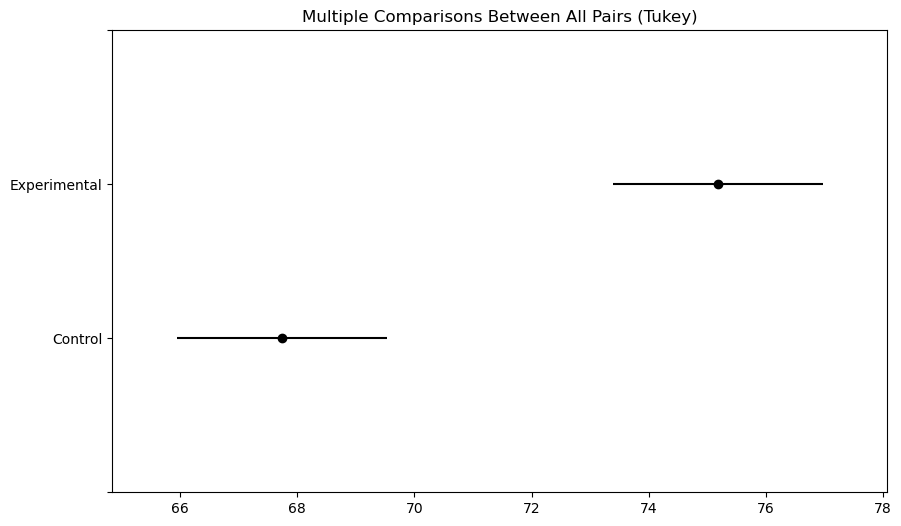

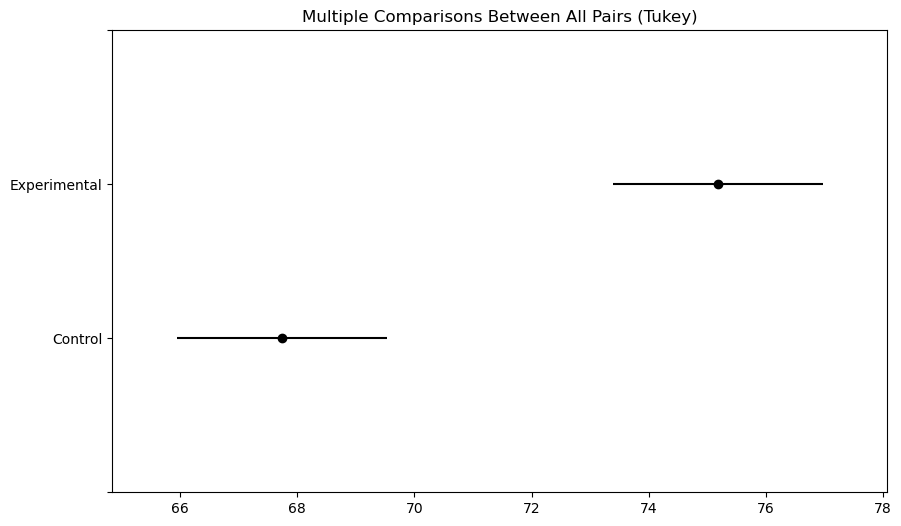

In [27]:
# Perform post-hoc tests

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Example data 
groups = ['Control'] * 50 + ['Experimental'] * 50
scores = np.concatenate([control_scores, experimental_scores])

# Perform Tukey's HSD post-hoc test
tukey_results = pairwise_tukeyhsd(scores, groups)

# Print Tukey's HSD results
print("\nTukey's HSD post-hoc test results:")
print(tukey_results)

# Plotting the results 
tukey_results.plot_simultaneous()


### Question 12

In [28]:
from statsmodels.stats.anova import AnovaRM

In [29]:
np.random.seed(42)
days = np.arange(1, 31)
stores = np.repeat(['A', 'B', 'C'], 30)
sales = np.random.randint(50, 100, size=90)

In [33]:
data = {
    'Store' : stores,
    'Day': np.tile(days,3),
    'Sales' : sales
}

In [34]:
df = pd.DataFrame(data)

In [36]:
df.head()

,Store,Day,Sales
0,A,1,88
1,A,2,78
2,A,3,64
3,A,4,92
4,A,5,57


In [37]:
# Fit repeated measures ANOVA model
rm_anova = AnovaRM(df, 'Sales', 'Day', within=['Store']).fit()

In [38]:
print(rm_anova.summary())

               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
Store  0.0324 2.0000 58.0000 0.9681



In [45]:
# Perform post-hoc Tukey's HSD test if ANOVA is significant
if rm_anova.anova_table['Pr > F'][0] < 0.05:
    posthoc = pairwise_tukeyhsd(df['Sales'], df['Store'], alpha=0.05)
    print("\nPost-hoc Tukey's HSD test results:")
    print(posthoc)
    
     # Interpretation of Tukey's HSD results
    for i in range(len(posthoc.reject)):
        store1 = posthoc.groupsunique[posthoc.group1[i]]
        store2 = posthoc.groupsunique[posthoc.group2[i]]
        if posthoc.reject[i]:
            print(f"There is a significant difference between '{store1}' and '{store2}'.")
        else:
            print(f"No significant difference between '{store1}' and '{store2}'.")
else:
    print("No significant differences found between the stores.")
    
posthoc = pairwise_tukeyhsd(df['Sales'], df['Store'], alpha=0.05)
print("\nPost-hoc Tukey's HSD test results:")
print(posthoc)

No significant differences found between the stores.

Post-hoc Tukey's HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B  -0.6667 0.9829 -9.6633   8.33  False
     A      C      0.3 0.9965 -8.6966 9.2966  False
     B      C   0.9667 0.9645   -8.03 9.9633  False
---------------------------------------------------
